# Projeto Final - Módulo 5 - PoloTech
## Estudo de Caso: Análise da aplicação de Machine Learning em um dataset sobre vinhos.

### Integrantes do grupo:
- Gustavo Wohlers ([linkedin](https://www.linkedin.com/in/gustavo-wohlers-6689b6213/); [GitHub](https://github.com/GustavoWohlers))
- Karine Alves ([linkedin](https://www.linkedin.com/in/almeida-karine/); [GitHub](https://github.com/karibeam))
- Luiz Fonseca ([linkedin](https://www.linkedin.com/in/luizfsf/); [GitHub](https://github.com/Luizfelz))
- Maísa Santos ([linkedin](https://www.linkedin.com/in/maisalauriane/); [GitHub](https://github.com/MaisaLauriane))
- Pablo Brito ([linkedin](https://www.linkedin.com/in/pablo-brito-/); [GitHub](https://github.com/pabloxD13))


### Objetivo do trabalho:

O objetivo do trabalho é fazer uso de algoritmos de aprendizado de máquinas para analisar as características e  prever a qualidade dos vinhos com base em suas propriedades químicas, como teor alcoólico, acidez, pH e outros fatores.

---
### Primeiro passo, importação das bibliotecas que serão utilizadas ao longo da análise:

In [ ]:
# Leitura do Dataset e import das bibliotecas importantes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import(
    GridSearchCV,
    train_test_split, 
    cross_validate, 
    KFold,
    RandomizedSearchCV,
    StratifiedKFold)
from sklearn.metrics import (
    classification_report,
    ConfusionMatrixDisplay,
    confusion_matrix,
    accuracy_score, 
    make_scorer)
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler,
    LabelEncoder)
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import (RFE,
     SelectFromModel)
from imblearn.under_sampling import ClusterCentroids
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

Leitura do dataset que será utilizado:

In [ ]:
df_whitewine = pd.read_csv('https://raw.githubusercontent.com/MaisaLauriane/MachineLearning/main/winequality-white.csv', sep = ';')

---
## Análise exploratória dos dados vinho branco

Quais são as features presentes no dataset?

In [ ]:
df_whitewine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


Existem valores Null ou NaN no dataset?

In [ ]:
df_whitewine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Qual a matriz de correlação do dataset?

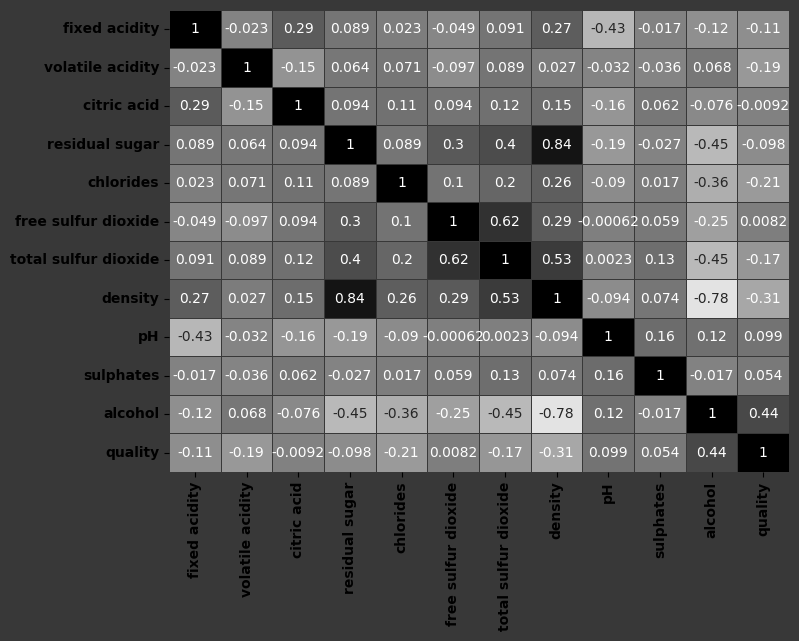

In [ ]:
plt.figure(figsize=(8,6),facecolor='#383838')
sns.heatmap(df_whitewine.corr(),
            annot=True,
            linewidths=.5,
            linecolor='#383838',
            center=0,
            cbar=False,
            cmap="binary")
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.show()

O quão desbalanceado está o target do dataset?

In [ ]:
df_whitewine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

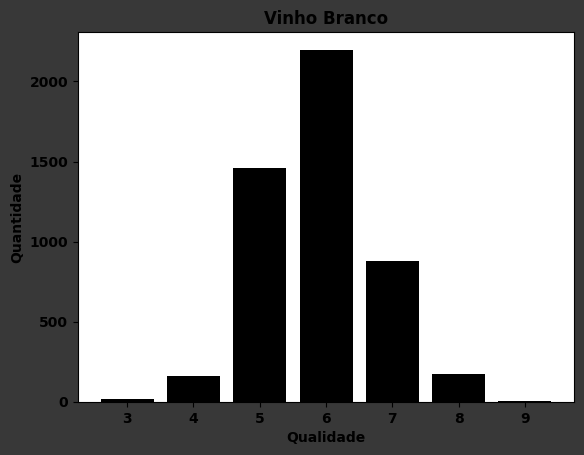

In [ ]:
plt.figure(facecolor='#383838')
plt.bar([3, 4, 5, 6, 7, 8, 9], [20, 163, 1457, 2198, 880, 175, 5], color="black")
plt.ylabel('Quantidade', fontweight='bold')
plt.yticks(weight = 'bold')
plt.xlabel('Qualidade',fontweight='bold')
plt.xticks(weight = 'bold')
plt.title('Vinho Branco',fontweight='bold')
#plt.legend(['3 = 20\n4 = 163\n5 = 1457\n6 = 2198\n7 = 880\n8 = 175\n9 = 5'], labelcolor = '#f2f3f7', frameon = False)
plt.show()

E em relação aos outliers?

In [ ]:
df_whitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Separando as quatro colunas com os maiores valores de outliers ('fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide'):

Text(0.5, 0, 'fixed acidity [g / dm³]')

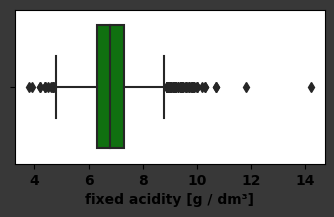

In [ ]:
plt.figure(figsize=(4,2),facecolor='#383838')
plt.xticks(weight = 'bold')
sns.boxplot(data = df_whitewine, x = 'fixed acidity', color='g')
plt.xlabel('fixed acidity [g / dm³]',fontweight='bold')

Text(0.5, 0, 'residual sugar [g / dm³]')

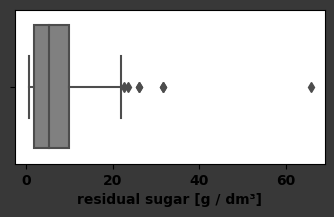

In [ ]:
plt.figure(figsize=(4,2),facecolor='#383838')
plt.xticks(weight = 'bold')
sns.boxplot(data = df_whitewine, x = 'residual sugar', color='gray')
plt.xlabel('residual sugar [g / dm³]',fontweight='bold')

Text(0.5, 0, 'free sulfur dioxide [mg / dm³]')

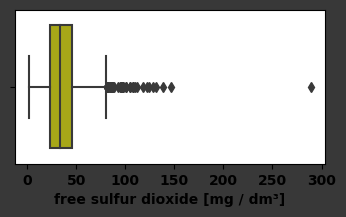

In [ ]:
plt.figure(figsize=(4,2),facecolor='#383838')
plt.xticks(weight = 'bold')
sns.boxplot(data = df_whitewine, x = 'free sulfur dioxide', color='y')
plt.xlabel('free sulfur dioxide [mg / dm³]',fontweight='bold')

Text(0.5, 0, 'total sulfur dioxide [mg / dm³]')

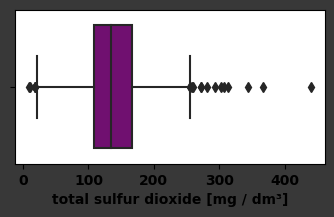

In [ ]:
plt.figure(figsize=(4,2),facecolor='#383838')
plt.xticks(weight = 'bold')
sns.boxplot(data = df_whitewine, x = 'total sulfur dioxide', color='purple')
plt.xlabel('total sulfur dioxide [mg / dm³]',fontweight='bold')

---
# Testando diferentes modelos para o dataset do vinho branco: resultados preliminares

Criando um dicionário para armazenar o resultado dos modelos

In [ ]:
dict_resultados={}

Criando o train test split

In [ ]:
X = df_whitewine.drop(columns = ['quality'])
y = df_whitewine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, stratify=y, random_state=42)
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

Realizado o treino com os dados padrões e criando uma baseline

In [ ]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("rf", RandomForestClassifier())]

pipe_rf = Pipeline(lista_etapas)

splitter = KFold(n_splits=10, shuffle=True, random_state=42)

## ====================

metrica = make_scorer(accuracy_score)

## ====================

param_grid = {"rf__n_estimators" : range(150, 200, 15),
              "rf__max_depth" : range(4, 8),
              "rf__max_features" : range(1, 3)}

rand_rf = RandomizedSearchCV(estimator=pipe_rf, 
                        param_distributions=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        verbose=10,
                       n_jobs=1)

In [ ]:
rand_rf.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=180.
[CV 1/10; 1/10] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=180;, score=0.571 total time=   0.8s
[CV 2/10; 1/10] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=180.
[CV 2/10; 1/10] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=180;, score=0.582 total time=   1.1s
[CV 3/10; 1/10] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=180.
[CV 3/10; 1/10] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=180;, score=0.549 total time=   1.1s
[CV 4/10; 1/10] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=180.
[CV 4/10; 1/10] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=180;, score=0.572 total time=   1.1s
[CV 5/10; 1/10] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=180.
[CV 5/10; 1/10] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=180;, score=0.

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                             ('rf', RandomForestClassifier())]),
                   n_jobs=1,
                   param_distributions={'rf__max_depth': range(4, 8),
                                        'rf__max_features': range(1, 3),
                                        'rf__n_estimators': range(150, 200, 15)},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [ ]:
print(f"Random best parameters: {rand_rf.best_params_}")
print(f"Random best Score: {rand_rf.best_score_}")
dict_resultados["Random Forest Baseline"] = rand_rf.best_score_

Random best parameters: {'rf__n_estimators': 180, 'rf__max_features': 2, 'rf__max_depth': 7}
Random best Score: 0.5809982525767089



Métricas de avaliação de treino:
[[   0    0    6    9    0    0    0]
 [   0   13   64   44    1    0    0]
 [   0    0  757  333    3    0    0]
 [   0    0  183 1438   27    0    0]
 [   0    0   17  409  234    0    0]
 [   0    0    0  106   25    0    0]
 [   0    0    0    2    2    0    0]]


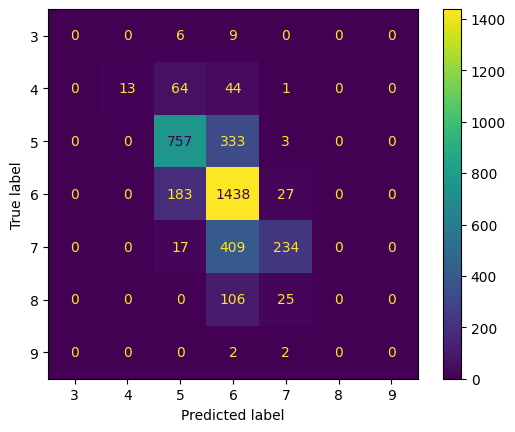

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        15
           4       1.00      0.11      0.19       122
           5       0.74      0.69      0.71      1093
           6       0.61      0.87      0.72      1648
           7       0.80      0.35      0.49       660
           8       0.00      0.00      0.00       131
           9       0.00      0.00      0.00         4

    accuracy                           0.66      3673
   macro avg       0.45      0.29      0.30      3673
weighted avg       0.67      0.66      0.63      3673


Métricas de avaliação de teste:
[[  0   0   1   4   0   0   0]
 [  0   0  27  14   0   0   0]
 [  0   0 192 172   0   0   0]
 [  0   0  84 444  22   0   0]
 [  0   0   6 156  58   0   0]
 [  0   0   0  36   8   0   0]
 [  0   0   0   0   1   0   0]]


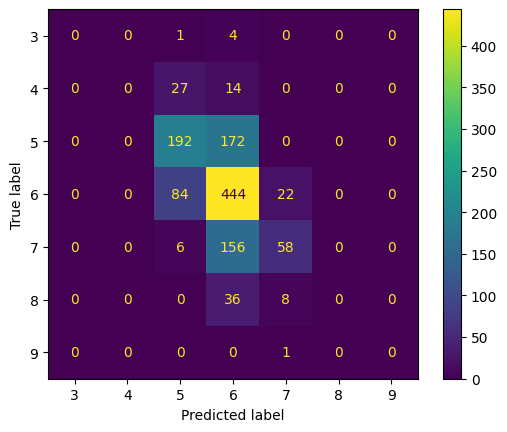

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        41
           5       0.62      0.53      0.57       364
           6       0.54      0.81      0.65       550
           7       0.65      0.26      0.38       220
           8       0.00      0.00      0.00        44
           9       0.00      0.00      0.00         1

    accuracy                           0.57      1225
   macro avg       0.26      0.23      0.23      1225
weighted avg       0.54      0.57      0.53      1225



In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = rand_rf.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = rand_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

---
### Nossa base de dados está desbalanceado, como vimos anteriormente, portanto temos poucas labels para vinhos de notas altas e baixas. Iremos testar os métodos de Undersampling e SMOTE (Synthetic Minority Over-sampling TEchnique) para tentar amenizar esse problema.

### Agora iremos utilizar a técnica de Cluster Centroids para realizar undersampling das labels 5, 6 e 7 e utilizar o SMOTE para criar dados artificiais para as labels 4 e 8

Primeiro iremos retirar os dados com quality 3 e 9 porque eles tem uma baixa quantidade e podem prejudicar a performance do modelo

In [ ]:
## Além do smote serão eliminaradas as variáveis quality = 3 e quality = 9
df_whitewine = df_whitewine.drop(df_whitewine[(df_whitewine['quality'] == 3) | (df_whitewine['quality'] == 9)].index)
X_2 = df_whitewine.drop(columns = ['quality'])
y_2 = df_whitewine['quality']

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, train_size = 0.75, random_state=42)

In [ ]:
y_train_2.value_counts()

6    1648
5    1074
7     676
8     135
4     121
Name: quality, dtype: int64

In [ ]:
cc = ClusterCentroids(random_state=42, sampling_strategy={4:121, 5:537, 6:824, 7:537, 8:135})
X_resampled, y_resampled = cc.fit_resample(X_train_2, y_train_2)
y_resampled.value_counts()

6    824
5    537
7    537
8    135
4    121
Name: quality, dtype: int64

In [ ]:
sm = SMOTE(random_state = 42, sampling_strategy={4:242, 5:537, 6:824, 7:537, 8:270})
X_train_sm, y_train_sm = sm.fit_resample(X_resampled, y_resampled.ravel())
y_train_sm
unique, counts = np.unique(y_train_sm, return_counts=True)
dict(zip(unique, counts))

{4: 242, 5: 537, 6: 824, 7: 537, 8: 270}

### Criando algoritmo e avaliando resultados com stratified kfold

In [ ]:
rand_rf2 = RandomizedSearchCV(estimator=pipe_rf, 
                        param_distributions=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10,
                        n_jobs=1)

In [ ]:
rand_rf2.fit(X_train_sm, y_train_sm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=195.
[CV 1/10; 1/10] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=195;, score=0.527 total time=   0.5s
[CV 2/10; 1/10] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=195.
[CV 2/10; 1/10] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=195;, score=0.461 total time=   0.5s
[CV 3/10; 1/10] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=195.
[CV 3/10; 1/10] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=195;, score=0.502 total time=   0.5s
[CV 4/10; 1/10] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=195.
[CV 4/10; 1/10] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=195;, score=0.473 total time=   0.5s
[CV 5/10; 1/10] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=195.
[CV 5/10; 1/10] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=195;, score=0.

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                             ('rf', RandomForestClassifier())]),
                   n_jobs=1,
                   param_distributions={'rf__max_depth': range(4, 8),
                                        'rf__max_features': range(1, 3),
                                        'rf__n_estimators': range(150, 200, 15)},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [ ]:
print(f"Grid best parameters: {rand_rf2.best_params_}")
print(f"Grid best Score: {rand_rf2.best_score_}")
dict_resultados["Random Forest SMOTE"] = rand_rf2.best_score_

Grid best parameters: {'rf__n_estimators': 150, 'rf__max_features': 2, 'rf__max_depth': 7}
Grid best Score: 0.5290456431535269



Métricas de avaliação de treino:
[[  62   31   24    4    0]
 [  28  567  439   39    1]
 [  10  162 1148  327    1]
 [   0   10  214  452    0]
 [   0    0   37   55   43]]


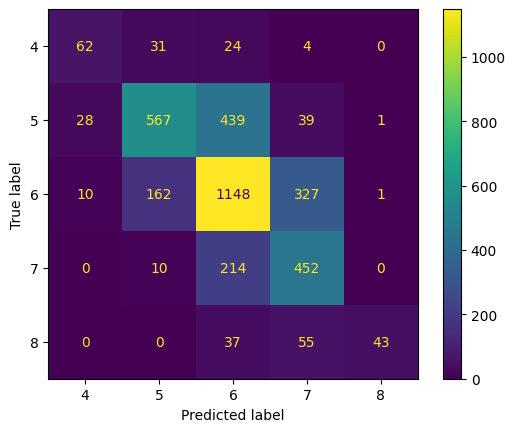

              precision    recall  f1-score   support

           4       0.62      0.51      0.56       121
           5       0.74      0.53      0.61      1074
           6       0.62      0.70      0.65      1648
           7       0.52      0.67      0.58       676
           8       0.96      0.32      0.48       135

    accuracy                           0.62      3654
   macro avg       0.69      0.54      0.58      3654
weighted avg       0.65      0.62      0.62      3654


Métricas de avaliação de teste:
[[ 17  16   8   1   0]
 [  6 171 188  18   0]
 [  9  81 346 114   0]
 [  0   1  83 120   0]
 [  0   0  18  20   2]]


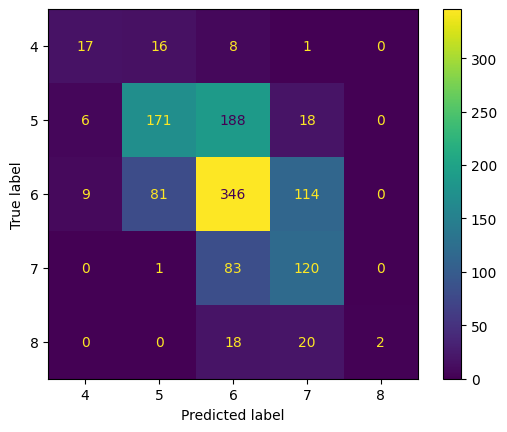

              precision    recall  f1-score   support

           4       0.53      0.40      0.46        42
           5       0.64      0.45      0.52       383
           6       0.54      0.63      0.58       550
           7       0.44      0.59      0.50       204
           8       1.00      0.05      0.10        40

    accuracy                           0.54      1219
   macro avg       0.63      0.42      0.43      1219
weighted avg       0.57      0.54      0.53      1219



In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = rand_rf2.predict(X_train_2)

print(confusion_matrix(y_train_2, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train_2, y_pred_train)
plt.show()

print(classification_report(y_train_2, y_pred_train))
# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = rand_rf2.predict(X_test_2)

print(confusion_matrix(y_test_2, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred_test)
plt.show()

print(classification_report(y_test_2, y_pred_test))

### Criando um classificador utilizando o algoritmo de SVC na base de dados originais e avaliando seu resultado




In [ ]:
lista_etapas = [("scale", StandardScaler()), ("svc", SVC())]

pipe_svc = Pipeline(lista_etapas)

## ====================

param_dist = {"svc__C": np.arange(2, 10, 2),
             "svc__gamma": np.arange(0.1, 1, 0.2)}

rand_svc = RandomizedSearchCV(estimator=pipe_svc, 
                        param_distributions=param_dist,
                        scoring=metrica,
                        cv=grupo,
                        verbose=10,
                        n_jobs=1)

In [ ]:
rand_svc.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START svc__C=8, svc__gamma=0.5000000000000001...................
[CV 1/10; 1/10] END svc__C=8, svc__gamma=0.5000000000000001;, score=0.644 total time=   2.1s
[CV 2/10; 1/10] START svc__C=8, svc__gamma=0.5000000000000001...................
[CV 2/10; 1/10] END svc__C=8, svc__gamma=0.5000000000000001;, score=0.622 total time=   1.5s
[CV 3/10; 1/10] START svc__C=8, svc__gamma=0.5000000000000001...................
[CV 3/10; 1/10] END svc__C=8, svc__gamma=0.5000000000000001;, score=0.633 total time=   1.2s
[CV 4/10; 1/10] START svc__C=8, svc__gamma=0.5000000000000001...................
[CV 4/10; 1/10] END svc__C=8, svc__gamma=0.5000000000000001;, score=0.643 total time=   1.2s
[CV 5/10; 1/10] START svc__C=8, svc__gamma=0.5000000000000001...................
[CV 5/10; 1/10] END svc__C=8, svc__gamma=0.5000000000000001;, score=0.632 total time=   1.2s
[CV 6/10; 1/10] START svc__C=8, svc__gamma=0.5000000000000001......

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scale', StandardScaler()),
                                             ('svc', SVC())]),
                   n_jobs=1,
                   param_distributions={'svc__C': array([2, 4, 6, 8]),
                                        'svc__gamma': array([0.1, 0.3, 0.5, 0.7, 0.9])},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [ ]:
print(f"Grid best parameters: {rand_svc.best_params_}")
print(f"Grid best Score: {rand_svc.best_score_}")
dict_resultados["SVC dados originais"] = rand_svc.best_score_

Grid best parameters: {'svc__gamma': 0.9000000000000001, 'svc__C': 8}
Grid best Score: 0.6370831358843739



Métricas de avaliação de treino:
[[   0    0    6    9    0    0    0]
 [   0   13   64   44    1    0    0]
 [   0    0  757  333    3    0    0]
 [   0    0  183 1438   27    0    0]
 [   0    0   17  409  234    0    0]
 [   0    0    0  106   25    0    0]
 [   0    0    0    2    2    0    0]]


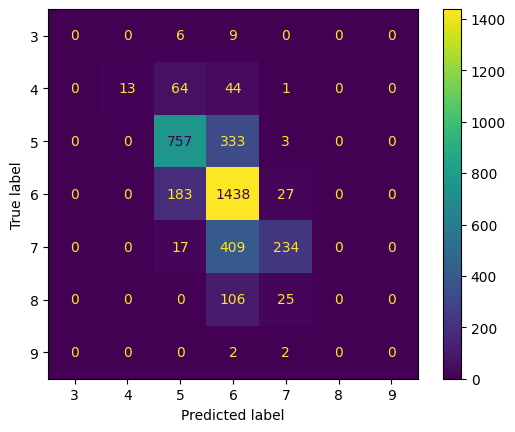

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        15
           4       1.00      0.11      0.19       122
           5       0.74      0.69      0.71      1093
           6       0.61      0.87      0.72      1648
           7       0.80      0.35      0.49       660
           8       0.00      0.00      0.00       131
           9       0.00      0.00      0.00         4

    accuracy                           0.66      3673
   macro avg       0.45      0.29      0.30      3673
weighted avg       0.67      0.66      0.63      3673


Métricas de avaliação de teste:
[[  0   0   1   4   0   0   0]
 [  0   0  27  14   0   0   0]
 [  0   0 192 172   0   0   0]
 [  0   0  84 444  22   0   0]
 [  0   0   6 156  58   0   0]
 [  0   0   0  36   8   0   0]
 [  0   0   0   0   1   0   0]]


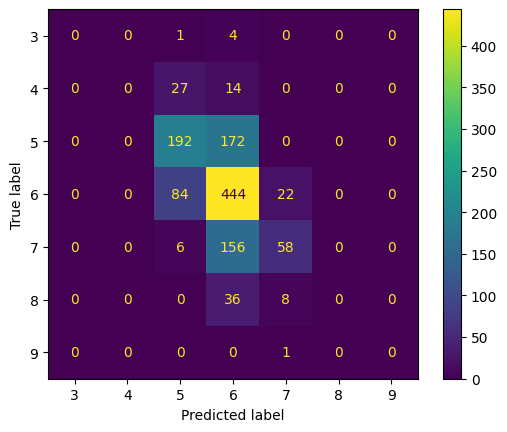

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        41
           5       0.62      0.53      0.57       364
           6       0.54      0.81      0.65       550
           7       0.65      0.26      0.38       220
           8       0.00      0.00      0.00        44
           9       0.00      0.00      0.00         1

    accuracy                           0.57      1225
   macro avg       0.26      0.23      0.23      1225
weighted avg       0.54      0.57      0.53      1225



In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = rand_rf.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))
# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = rand_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

### Utilizando a base de dados alteradas com underfitting e SMOTE no algoritmo de SVC


In [ ]:
rand_svc_sm = RandomizedSearchCV(estimator=pipe_svc, 
                        param_distributions=param_dist,
                        scoring=metrica,
                        cv=grupo,
                        verbose=10,
                        n_jobs=1)

In [ ]:
rand_svc_sm.fit(X_train_sm, y_train_sm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START svc__C=4, svc__gamma=0.9000000000000001...................
[CV 1/10; 1/10] END svc__C=4, svc__gamma=0.9000000000000001;, score=0.552 total time=   0.5s
[CV 2/10; 1/10] START svc__C=4, svc__gamma=0.9000000000000001...................
[CV 2/10; 1/10] END svc__C=4, svc__gamma=0.9000000000000001;, score=0.531 total time=   0.5s
[CV 3/10; 1/10] START svc__C=4, svc__gamma=0.9000000000000001...................
[CV 3/10; 1/10] END svc__C=4, svc__gamma=0.9000000000000001;, score=0.564 total time=   0.5s
[CV 4/10; 1/10] START svc__C=4, svc__gamma=0.9000000000000001...................
[CV 4/10; 1/10] END svc__C=4, svc__gamma=0.9000000000000001;, score=0.490 total time=   0.5s
[CV 5/10; 1/10] START svc__C=4, svc__gamma=0.9000000000000001...................
[CV 5/10; 1/10] END svc__C=4, svc__gamma=0.9000000000000001;, score=0.564 total time=   0.5s
[CV 6/10; 1/10] START svc__C=4, svc__gamma=0.9000000000000001......

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scale', StandardScaler()),
                                             ('svc', SVC())]),
                   n_jobs=1,
                   param_distributions={'svc__C': array([2, 4, 6, 8]),
                                        'svc__gamma': array([0.1, 0.3, 0.5, 0.7, 0.9])},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [ ]:
print(f"Best parameters found: {rand_svc_sm.best_params_}")
print(f"Best Score found: {rand_svc_sm.best_score_}")
dict_resultados["SVC SMOTE"] = rand_svc_sm.best_score_

Best parameters found: {'svc__gamma': 0.5000000000000001, 'svc__C': 2}
Best Score found: 0.5688796680497925



Métricas de avaliação de treino:
[[ 115    3    2    1    0]
 [  25  763  239   45    2]
 [  20  127 1220  258   23]
 [   0    6   56  608    6]
 [   0    0    3   12  120]]


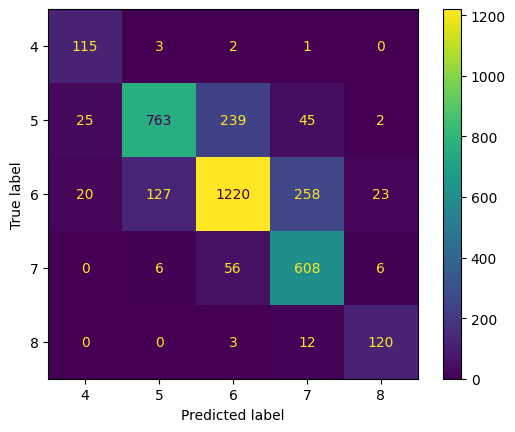

              precision    recall  f1-score   support

           4       0.72      0.95      0.82       121
           5       0.85      0.71      0.77      1074
           6       0.80      0.74      0.77      1648
           7       0.66      0.90      0.76       676
           8       0.79      0.89      0.84       135

    accuracy                           0.77      3654
   macro avg       0.76      0.84      0.79      3654
weighted avg       0.79      0.77      0.77      3654


Métricas de avaliação de teste:
[[ 16   9  15   2   0]
 [ 15 206 141  19   2]
 [  7 102 333  94  14]
 [  1   3  55 136   9]
 [  0   2  10  14  14]]


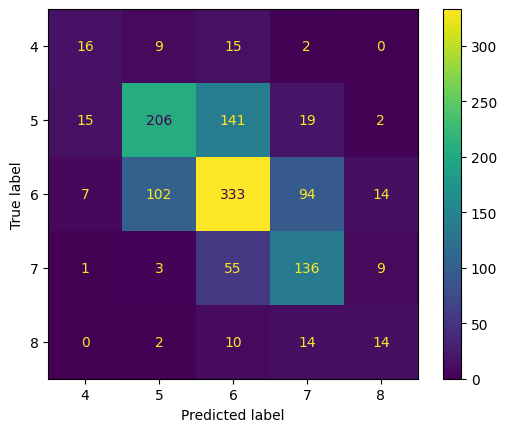

              precision    recall  f1-score   support

           4       0.41      0.38      0.40        42
           5       0.64      0.54      0.58       383
           6       0.60      0.61      0.60       550
           7       0.51      0.67      0.58       204
           8       0.36      0.35      0.35        40

    accuracy                           0.58      1219
   macro avg       0.50      0.51      0.50      1219
weighted avg       0.58      0.58      0.58      1219



In [ ]:
print("\nMétricas de avaliação de treino:")

y_pred_train = rand_svc_sm.predict(X_train_2)

print(confusion_matrix(y_train_2, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train_2, y_pred_train)
plt.show()

print(classification_report(y_train_2, y_pred_train))
# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = rand_svc_sm.predict(X_test_2)

print(confusion_matrix(y_test_2, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred_test)
plt.show()

print(classification_report(y_test_2, y_pred_test))


### Utilizando técnicas de Feature Selection para verificar possibilidade de melhorias no score


In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=42), max_features=11)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                max_features=11)

In [ ]:
sel.get_support()

array([False,  True, False, False, False,  True, False,  True, False,
       False,  True])

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

4

In [ ]:
print(selected_feat)

Index(['volatile acidity', 'free sulfur dioxide', 'density', 'alcohol'], dtype='object')


In [ ]:
df_whitewine_fs = df_whitewine[['volatile acidity', 'free sulfur dioxide', 'density', 'alcohol', 'quality']]
df_whitewine_fs.head(3)

,volatile acidity,free sulfur dioxide,density,alcohol,quality
0,0.27,45.0,1.0010,8.8,6
1,0.30,14.0,0.9940,9.5,6
2,0.28,30.0,0.9951,10.1,6


In [ ]:
X_fs = df_whitewine_fs.drop(columns = ['quality'])
y_fs = df_whitewine_fs['quality']
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, train_size = 0.75, random_state=42)
rand_rf_fs = RandomizedSearchCV(estimator=pipe_rf, 
                        param_distributions=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10,
                        n_jobs=1)
rand_rf_fs.fit(X_train_fs, y_train_fs)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=165.
[CV 1/10; 1/10] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=165;, score=0.555 total time=   0.6s
[CV 2/10; 1/10] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=165.
[CV 2/10; 1/10] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=165;, score=0.544 total time=   0.6s
[CV 3/10; 1/10] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=165.
[CV 3/10; 1/10] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=165;, score=0.503 total time=   0.5s
[CV 4/10; 1/10] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=165.
[CV 4/10; 1/10] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=165;, score=0.536 total time=   0.5s
[CV 5/10; 1/10] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=165.
[CV 5/10; 1/10] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=165;, score=0.

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                             ('rf', RandomForestClassifier())]),
                   n_jobs=1,
                   param_distributions={'rf__max_depth': range(4, 8),
                                        'rf__max_features': range(1, 3),
                                        'rf__n_estimators': range(150, 200, 15)},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [ ]:
print(f"Best parameters found: {rand_rf_fs.best_params_}")
print(f"Best score found: {rand_rf_fs.best_score_}")
dict_resultados["Random Forest Feature Selection"] = rand_rf_fs.best_score_

Best parameters found: {'rf__n_estimators': 150, 'rf__max_features': 1, 'rf__max_depth': 6}
Best score found: 0.5555610449883973



Métricas de avaliação de treino:
[[   6   70   43    2    0]
 [   0  677  392    5    0]
 [   0  263 1338   47    0]
 [   0   30  454  192    0]
 [   0    0   95   38    2]]


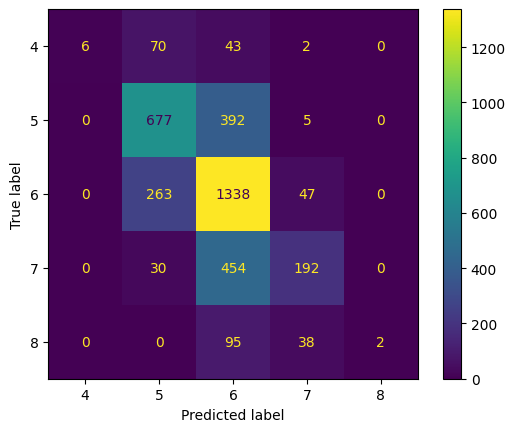

              precision    recall  f1-score   support

           4       1.00      0.05      0.09       121
           5       0.65      0.63      0.64      1074
           6       0.58      0.81      0.67      1648
           7       0.68      0.28      0.40       676
           8       1.00      0.01      0.03       135

    accuracy                           0.61      3654
   macro avg       0.78      0.36      0.37      3654
weighted avg       0.65      0.61      0.57      3654


Métricas de avaliação de teste:
[[  0  28  14   0   0]
 [  0 218 162   3   0]
 [  0 119 410  21   0]
 [  0   9 154  41   0]
 [  0   1  34   5   0]]


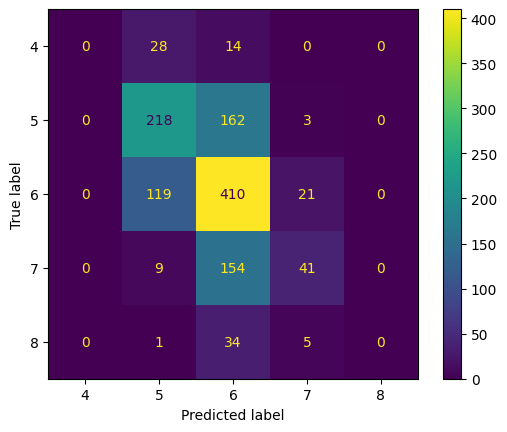

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        42
           5       0.58      0.57      0.58       383
           6       0.53      0.75      0.62       550
           7       0.59      0.20      0.30       204
           8       0.00      0.00      0.00        40

    accuracy                           0.55      1219
   macro avg       0.34      0.30      0.30      1219
weighted avg       0.52      0.55      0.51      1219



In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = rand_rf_fs.predict(X_train_fs)

print(confusion_matrix(y_train_fs, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train_fs, y_pred_train)
plt.show()

print(classification_report(y_train_fs, y_pred_train))
# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = rand_rf_fs.predict(X_test_fs)

print(confusion_matrix(y_test_fs, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test_fs, y_pred_test)
plt.show()

print(classification_report(y_test_fs, y_pred_test))

### Verificando acuárica utilizando o algoritmo de AdaBoost

In [ ]:
lista_etapas_adb = [("std_scaler", StandardScaler()), 
                ("adb", AdaBoostClassifier())]

pipe_adb = Pipeline(lista_etapas_adb)

splitter = KFold(n_splits=10, shuffle=True, random_state=42)

## ====================

metrica = make_scorer(accuracy_score)

## ====================

param_dist_adb = {  'adb__n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
                    'adb__learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
                    'adb__algorithm': ['SAMME', 'SAMME.R']}



In [ ]:
rand_adb = RandomizedSearchCV(estimator=pipe_adb, 
                        param_distributions=param_dist_adb,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10,
                        error_score='raise',
                        n_jobs=1)

In [ ]:
rand_adb.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START adb__algorithm=SAMME, adb__learning_rate=1.03, adb__n_estimators=20
[CV 1/10; 1/10] END adb__algorithm=SAMME, adb__learning_rate=1.03, adb__n_estimators=20;, score=0.492 total time=   0.1s
[CV 2/10; 1/10] START adb__algorithm=SAMME, adb__learning_rate=1.03, adb__n_estimators=20
[CV 2/10; 1/10] END adb__algorithm=SAMME, adb__learning_rate=1.03, adb__n_estimators=20;, score=0.435 total time=   0.1s
[CV 3/10; 1/10] START adb__algorithm=SAMME, adb__learning_rate=1.03, adb__n_estimators=20
[CV 3/10; 1/10] END adb__algorithm=SAMME, adb__learning_rate=1.03, adb__n_estimators=20;, score=0.476 total time=   0.1s
[CV 4/10; 1/10] START adb__algorithm=SAMME, adb__learning_rate=1.03, adb__n_estimators=20
[CV 4/10; 1/10] END adb__algorithm=SAMME, adb__learning_rate=1.03, adb__n_estimators=20;, score=0.499 total time=   0.1s
[CV 5/10; 1/10] START adb__algorithm=SAMME, adb__learning_rate=1.03, adb__n_estimators=20
[CV

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                             ('adb', AdaBoostClassifier())]),
                   n_jobs=1,
                   param_distributions={'adb__algorithm': ['SAMME', 'SAMME.R'],
                                        'adb__learning_rate': [0.97, 0.98, 0.99,
                                                               1.0, 1.01, 1.02,
                                                               1.03, 1.04],
                                        'adb__n_estimators': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              20]},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [ ]:
print(f"Best parameters found: {rand_adb.best_params_}")
print(f"Best score found: {rand_adb.best_score_}")
dict_resultados["AdaBoost"] = rand_adb.best_score_

Best parameters found: {'adb__n_estimators': 12, 'adb__learning_rate': 1.02, 'adb__algorithm': 'SAMME'}
Best score found: 0.48678251984362053



Métricas de avaliação de treino:
[[   0    0    2   13    0    0    0]
 [   0    2   43   74    3    0    0]
 [   0    1  167  913    6    6    0]
 [   0    0   68 1498   16   66    0]
 [   0    0    3  608   16   33    0]
 [   0    0    0  115    7    9    0]
 [   0    0    0    4    0    0    0]]


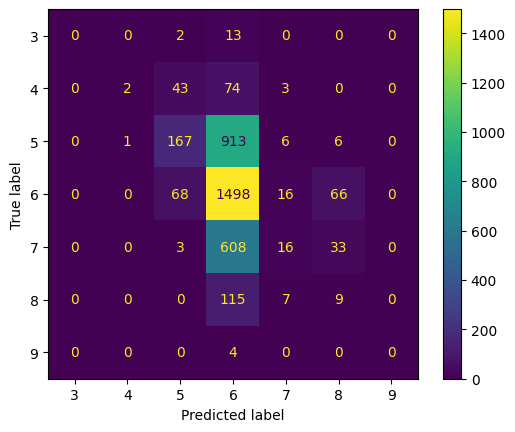

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        15
           4       0.67      0.02      0.03       122
           5       0.59      0.15      0.24      1093
           6       0.46      0.91      0.61      1648
           7       0.33      0.02      0.05       660
           8       0.08      0.07      0.07       131
           9       0.00      0.00      0.00         4

    accuracy                           0.46      3673
   macro avg       0.30      0.17      0.14      3673
weighted avg       0.47      0.46      0.36      3673


Métricas de avaliação de teste:
[[  0   0   0   5   0   0   0]
 [  0   0  10  30   0   1   0]
 [  0   0  44 317   1   2   0]
 [  0   0  32 497   6  15   0]
 [  0   0   1 205   4  10   0]
 [  0   0   0  38   2   4   0]
 [  0   0   0   1   0   0   0]]


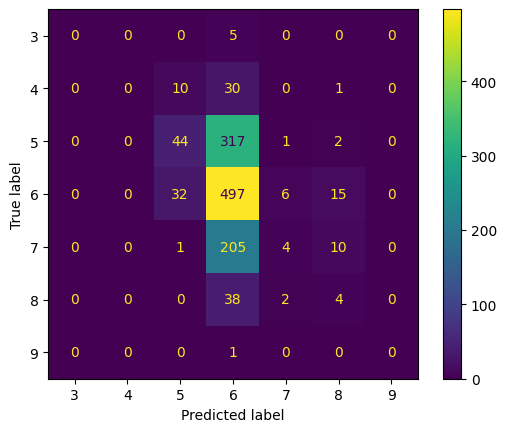

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        41
           5       0.51      0.12      0.20       364
           6       0.45      0.90      0.60       550
           7       0.31      0.02      0.03       220
           8       0.12      0.09      0.11        44
           9       0.00      0.00      0.00         1

    accuracy                           0.45      1225
   macro avg       0.20      0.16      0.13      1225
weighted avg       0.41      0.45      0.34      1225



In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = rand_adb.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))
# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = rand_adb.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))


### Utilizando AdaBoost nos dados com smote

In [ ]:
rand_adb_sm = RandomizedSearchCV(estimator=pipe_adb, 
                        param_distributions=param_dist_adb,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10,
                        error_score='raise',
                        n_jobs=1)

In [ ]:
rand_adb_sm.fit(X_train_sm, y_train_sm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START adb__algorithm=SAMME, adb__learning_rate=1.0, adb__n_estimators=2
[CV 1/10; 1/10] END adb__algorithm=SAMME, adb__learning_rate=1.0, adb__n_estimators=2;, score=0.324 total time=   0.0s
[CV 2/10; 1/10] START adb__algorithm=SAMME, adb__learning_rate=1.0, adb__n_estimators=2
[CV 2/10; 1/10] END adb__algorithm=SAMME, adb__learning_rate=1.0, adb__n_estimators=2;, score=0.407 total time=   0.0s
[CV 3/10; 1/10] START adb__algorithm=SAMME, adb__learning_rate=1.0, adb__n_estimators=2
[CV 3/10; 1/10] END adb__algorithm=SAMME, adb__learning_rate=1.0, adb__n_estimators=2;, score=0.357 total time=   0.0s
[CV 4/10; 1/10] START adb__algorithm=SAMME, adb__learning_rate=1.0, adb__n_estimators=2
[CV 4/10; 1/10] END adb__algorithm=SAMME, adb__learning_rate=1.0, adb__n_estimators=2;, score=0.353 total time=   0.0s
[CV 5/10; 1/10] START adb__algorithm=SAMME, adb__learning_rate=1.0, adb__n_estimators=2
[CV 5/10; 1/10] END a

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                             ('adb', AdaBoostClassifier())]),
                   n_jobs=1,
                   param_distributions={'adb__algorithm': ['SAMME', 'SAMME.R'],
                                        'adb__learning_rate': [0.97, 0.98, 0.99,
                                                               1.0, 1.01, 1.02,
                                                               1.03, 1.04],
                                        'adb__n_estimators': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              20]},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [ ]:
print(f"Best parameters found: {rand_adb_sm.best_params_}")
print(f"Best score found: {rand_adb_sm.best_score_}")
dict_resultados["AdaBoost SMOTE"] = rand_adb_sm.best_score_

Best parameters found: {'adb__n_estimators': 7, 'adb__learning_rate': 0.98, 'adb__algorithm': 'SAMME.R'}
Best score found: 0.4385892116182573



Métricas de avaliação de treino:
[[ 35  59  20   7   0]
 [ 76 664 242  68  24]
 [ 46 461 617 510  14]
 [  6  62 190 418   0]
 [  1   5  21  98  10]]


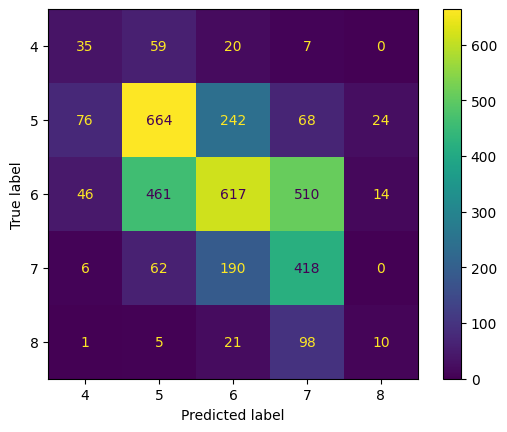

              precision    recall  f1-score   support

           4       0.21      0.29      0.25       121
           5       0.53      0.62      0.57      1074
           6       0.57      0.37      0.45      1648
           7       0.38      0.62      0.47       676
           8       0.21      0.07      0.11       135

    accuracy                           0.48      3654
   macro avg       0.38      0.39      0.37      3654
weighted avg       0.50      0.48      0.47      3654


Métricas de avaliação de teste:
[[ 17  17   6   2   0]
 [ 26 221  93  34   9]
 [ 16 164 198 168   4]
 [  5  16  50 133   0]
 [  1   1   5  31   2]]


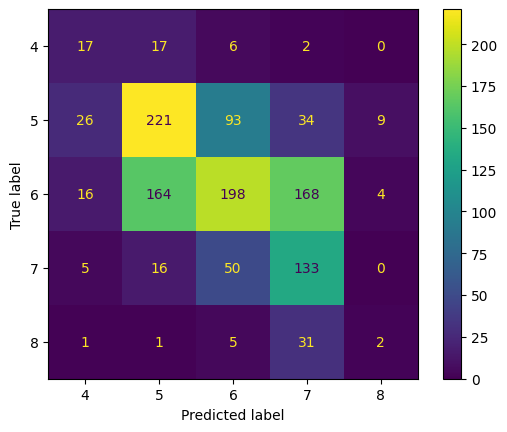

              precision    recall  f1-score   support

           4       0.26      0.40      0.32        42
           5       0.53      0.58      0.55       383
           6       0.56      0.36      0.44       550
           7       0.36      0.65      0.47       204
           8       0.13      0.05      0.07        40

    accuracy                           0.47      1219
   macro avg       0.37      0.41      0.37      1219
weighted avg       0.49      0.47      0.46      1219



In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = rand_adb_sm.predict(X_train_2)

print(confusion_matrix(y_train_2, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train_2, y_pred_train)
plt.show()

print(classification_report(y_train_2, y_pred_train))
# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = rand_adb_sm.predict(X_test_2)

print(confusion_matrix(y_test_2, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred_test)
plt.show()

print(classification_report(y_test_2, y_pred_test))

### Refirando os outliers, também utilizando técnicas de Undersampling e SMOTE e testando novamente


In [ ]:
signal_filter = df_whitewine.drop(["quality"], axis=1).columns

In [ ]:
signal_filter

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
quantil_min = 0.02
quantil_max = 0.98
df_res = df_whitewine.copy()

for i in signal_filter:
    min_f = df_whitewine[i].quantile(quantil_min)
    max_f = df_whitewine[i].quantile(quantil_max)
    df_res = df_res[(df_res[i]>=min_f) & (df_res[i]<=max_f)]

In [ ]:
df_res.quality.value_counts()

6    1641
5    1013
7     644
8     120
4      74
Name: quality, dtype: int64

In [ ]:
df_whitewine.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
Name: quality, dtype: int64

In [ ]:
## Além do smote serão eliminaradas as variáveis quality = 3 e quality = 9
df_res = df_res.drop(df_res[(df_res['quality'] == 3) | (df_res['quality'] == 9)].index)

In [ ]:
X_res = df_res.drop(['quality'], axis=1)
y_res = df_res['quality']

In [ ]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, train_size = 0.75, random_state=42)

In [ ]:
y_train_res.value_counts()

6    1234
5     762
7     481
8      90
4      52
Name: quality, dtype: int64

In [ ]:
cc = ClusterCentroids(random_state=42, sampling_strategy={4:52, 5:600, 6:750, 7:481, 8:90})
X_resampled_res, y_resampled_res = cc.fit_resample(X_train_res, y_train_res)

In [ ]:
y_resampled_res.value_counts()

6    750
5    600
7    481
8     90
4     52
Name: quality, dtype: int64

In [ ]:
sm = SMOTE(random_state = 42, sampling_strategy={4:130, 5:600, 6:750, 7:498, 8:200})

In [ ]:
X_train_sm_res, y_train_sm_res = sm.fit_resample(X_resampled_res, y_resampled_res.ravel())

In [ ]:
y_train_sm_res

array([4, 4, 4, ..., 8, 8, 8])

In [ ]:
unique, counts = np.unique(y_train_sm_res, return_counts=True)

In [ ]:
dict(zip(unique, counts))

{4: 130, 5: 600, 6: 750, 7: 498, 8: 200}

#### Testando RF


In [ ]:
rand_rf_out = RandomizedSearchCV(estimator=pipe_rf, 
                        param_distributions=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10,
                        n_jobs=1)

In [ ]:
rand_rf_out.fit(X_train_sm_res, y_train_sm_res)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=150.
[CV 1/10; 1/10] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=150;, score=0.505 total time=   0.4s
[CV 2/10; 1/10] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=150.
[CV 2/10; 1/10] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=150;, score=0.528 total time=   0.4s
[CV 3/10; 1/10] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=150.
[CV 3/10; 1/10] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=150;, score=0.472 total time=   0.4s
[CV 4/10; 1/10] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=150.
[CV 4/10; 1/10] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=150;, score=0.482 total time=   0.4s
[CV 5/10; 1/10] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=150.
[CV 5/10; 1/10] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=150;, score=0.

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                             ('rf', RandomForestClassifier())]),
                   n_jobs=1,
                   param_distributions={'rf__max_depth': range(4, 8),
                                        'rf__max_features': range(1, 3),
                                        'rf__n_estimators': range(150, 200, 15)},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [ ]:
print(f"Best parameters found: {rand_rf_out.best_params_}")
print(f"Best score found: {rand_rf_out.best_score_}")
dict_resultados["Random Forest sem Outliers"] = rand_rf_out.best_score_

Best parameters found: {'rf__n_estimators': 150, 'rf__max_features': 2, 'rf__max_depth': 7}
Best score found: 0.530273115461041



Métricas de avaliação de treino:
[[ 10  27  13   2   0]
 [  0 599 141  22   0]
 [  0 213 839 182   0]
 [  0  29 117 335   0]
 [  0   1  26  33  30]]


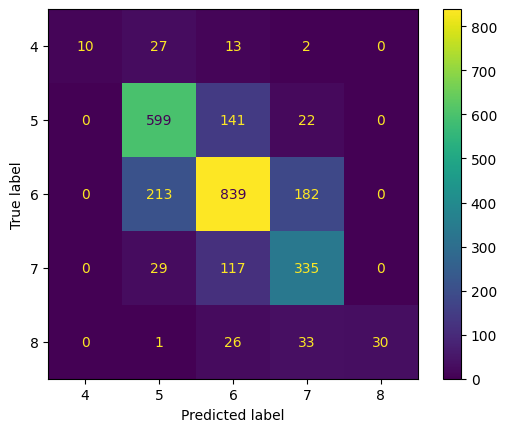

              precision    recall  f1-score   support

           4       1.00      0.19      0.32        52
           5       0.69      0.79      0.73       762
           6       0.74      0.68      0.71      1234
           7       0.58      0.70      0.64       481
           8       1.00      0.33      0.50        90

    accuracy                           0.69      2619
   macro avg       0.80      0.54      0.58      2619
weighted avg       0.71      0.69      0.69      2619


Métricas de avaliação de teste:
[[  0  18   4   0   0]
 [  0 165  75  11   0]
 [  0  91 246  70   0]
 [  0   7  74  82   0]
 [  0   0  12  14   4]]


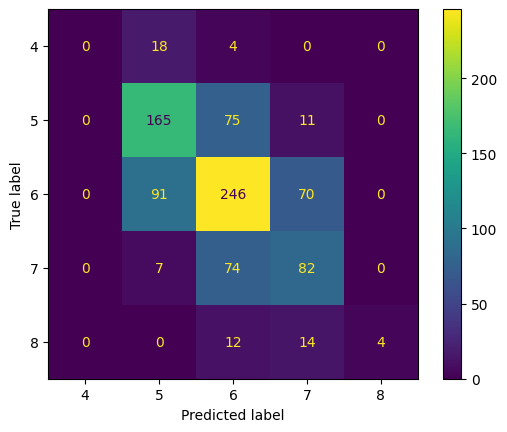

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        22
           5       0.59      0.66      0.62       251
           6       0.60      0.60      0.60       407
           7       0.46      0.50      0.48       163
           8       1.00      0.13      0.24        30

    accuracy                           0.57       873
   macro avg       0.53      0.38      0.39       873
weighted avg       0.57      0.57      0.56       873



In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = rand_rf_out.predict(X_train_res)

print(confusion_matrix(y_train_res, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train_res, y_pred_train)
plt.show()

print(classification_report(y_train_res, y_pred_train))
# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = rand_rf_out.predict(X_test_res)

print(confusion_matrix(y_test_res, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test_res, y_pred_test)
plt.show()

print(classification_report(y_test_res, y_pred_test))

#### Testando SVC

In [ ]:
rand_svc_out = RandomizedSearchCV(estimator=pipe_svc, 
                        param_distributions=param_dist,
                        scoring=metrica,
                        cv=grupo,
                        n_iter=10,
                        verbose=10,
                        n_jobs=1)

In [ ]:
rand_svc_out.fit(X_train_sm_res, y_train_sm_res)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START svc__C=6, svc__gamma=0.7000000000000001...................
[CV 1/10; 1/10] END svc__C=6, svc__gamma=0.7000000000000001;, score=0.578 total time=   0.4s
[CV 2/10; 1/10] START svc__C=6, svc__gamma=0.7000000000000001...................
[CV 2/10; 1/10] END svc__C=6, svc__gamma=0.7000000000000001;, score=0.596 total time=   0.4s
[CV 3/10; 1/10] START svc__C=6, svc__gamma=0.7000000000000001...................
[CV 3/10; 1/10] END svc__C=6, svc__gamma=0.7000000000000001;, score=0.606 total time=   0.4s
[CV 4/10; 1/10] START svc__C=6, svc__gamma=0.7000000000000001...................
[CV 4/10; 1/10] END svc__C=6, svc__gamma=0.7000000000000001;, score=0.573 total time=   0.4s
[CV 5/10; 1/10] START svc__C=6, svc__gamma=0.7000000000000001...................
[CV 5/10; 1/10] END svc__C=6, svc__gamma=0.7000000000000001;, score=0.592 total time=   0.4s
[CV 6/10; 1/10] START svc__C=6, svc__gamma=0.7000000000000001......

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scale', StandardScaler()),
                                             ('svc', SVC())]),
                   n_jobs=1,
                   param_distributions={'svc__C': array([2, 4, 6, 8]),
                                        'svc__gamma': array([0.1, 0.3, 0.5, 0.7, 0.9])},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [ ]:
print(f"Best parameters found: {rand_svc_out.best_params_}")
print(f"Best score found: {rand_svc_out.best_score_}")
dict_resultados["SVC sem Outliers"] = rand_svc_out.best_score_

Best parameters found: {'svc__gamma': 0.9000000000000001, 'svc__C': 2}
Best score found: 0.5900033822348115



Métricas de avaliação de treino:
[[  52    0    0    0    0]
 [   0  739   23    0    0]
 [   1   61 1122   49    1]
 [   0    0    2  478    1]
 [   0    0    0    1   89]]


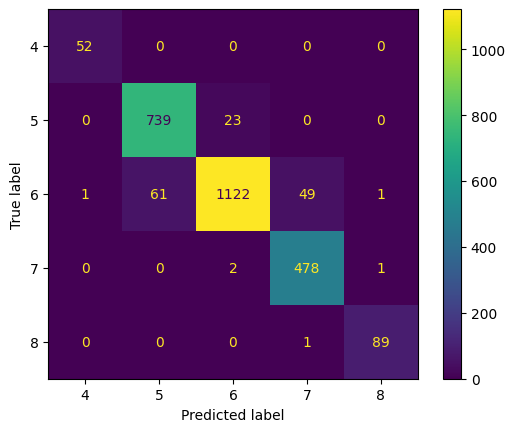

              precision    recall  f1-score   support

           4       0.98      1.00      0.99        52
           5       0.92      0.97      0.95       762
           6       0.98      0.91      0.94      1234
           7       0.91      0.99      0.95       481
           8       0.98      0.99      0.98        90

    accuracy                           0.95      2619
   macro avg       0.95      0.97      0.96      2619
weighted avg       0.95      0.95      0.95      2619


Métricas de avaliação de teste:
[[  4   6  12   0   0]
 [  0 148 100   3   0]
 [  2  69 316  18   2]
 [  0   4  83  70   6]
 [  0   0  13   6  11]]


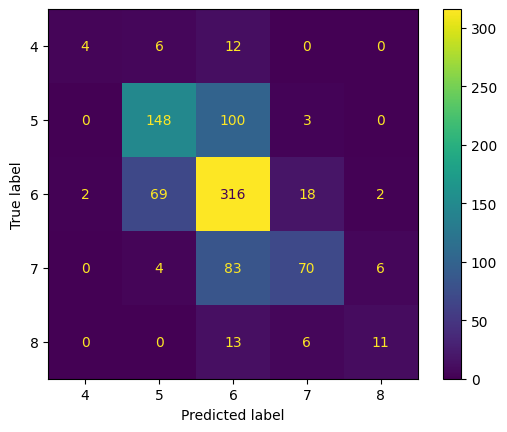

              precision    recall  f1-score   support

           4       0.67      0.18      0.29        22
           5       0.65      0.59      0.62       251
           6       0.60      0.78      0.68       407
           7       0.72      0.43      0.54       163
           8       0.58      0.37      0.45        30

    accuracy                           0.63       873
   macro avg       0.64      0.47      0.51       873
weighted avg       0.64      0.63      0.62       873



In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train_svc = rand_svc_out.predict(X_train_res)

print(confusion_matrix(y_train_res, y_pred_train_svc))

ConfusionMatrixDisplay.from_predictions(y_train_res, y_pred_train_svc)
plt.show()

print(classification_report(y_train_res, y_pred_train_svc))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test_svc = rand_svc_out.predict(X_test_res)

print(confusion_matrix(y_test_res, y_pred_test_svc))

ConfusionMatrixDisplay.from_predictions(y_test_res, y_pred_test_svc)
plt.show()

print(classification_report(y_test_res, y_pred_test_svc))

## Resultados dos algoritmos 


In [ ]:
## Criando um datafame a partir do dicionário para exibir os resultados:

resultados = pd.DataFrame.from_dict(dict_resultados, orient='index', columns=['Score'])
resultados = resultados.sort_values(by='Score', ascending=False)
resultados = resultados.reset_index().rename(columns={'index': 'Modelo'})

resultados.head(20)

,Modelo,Score
0,SVC dados originais,0.637083
1,SVC sem Outliers,0.590003
2,Random Forest Baseline,0.580998
3,SVC SMOTE,0.568880
4,Random Forest Feature Selection,0.555561
5,Random Forest sem Outliers,0.530273
6,Random Forest SMOTE,0.529046
7,AdaBoost,0.486783
8,AdaBoost SMOTE,0.438589


---
# Resultados Finais

**Nova abordagem:**

Após o teste de diferentes técnicas, vistas acima, ficou constatada a baixa acurácia para os diferentes modelos. Como possível solução, o problema foi dividido em duas etapas:

- Classificar o vinho como bom ou ruim;
- Diferenciar a classificação do vinho bom.

**Novos Algoritmos:**

O primeiro algoritmo irá classificar entre vinho bom e vinho ruim:

```
qualidade_vinho = {3:'bad', 4: 'bad', 5: 'bad', 6: 'bad', 7: 'good', 8: 'good', 9:'good'}
```



O segundo algoritmo irá diferenciar a classe dos vinhos bons:

```
df_whitewine_good = df_whitewine[df_whitewine['quality'].isin([7, 8])]
```

<“Obs.: nota 9 não utilizada, pois apresenta poucas amostras” >

### Reformulando as labels de qualidade para Vinhos Bons, médios e ruins, lembrando que: [3, 4, 5 e 6] são classificados como vinhos ruins e [7,8,9] classificados como vinhos bons.

In [ ]:
qualidade_vinho = {3:'bad', 4: 'bad', 5: 'bad', 6: 'bad', 7: 'good', 8: 'good', 9:'good'}

In [ ]:
df_whitewine_rlb = pd.DataFrame.copy(df_whitewine)

In [ ]:
df_whitewine_rlb['quality'] = df_whitewine['quality'].replace({3:'bad', 4: 'bad', 5: 'bad', 6: 'bad', 7: 'good', 8: 'good', 9:'good'})

In [ ]:
df_whitewine_rlb.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,bad
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,bad
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,bad


In [ ]:
df_whitewine_rlb['quality'].value_counts()

bad     3838
good    1060
Name: quality, dtype: int64

In [ ]:
X_rlb = df_whitewine_rlb.drop(columns = ['quality'])
y_rlb = df_whitewine_rlb['quality']

In [ ]:
X_train_rlb, X_test_rlb, y_train_rlb, y_test_rlb = train_test_split(X_rlb, y_rlb, train_size = 0.75, stratify=y_rlb, random_state=42)

### Testando RandomForest com relabel

In [ ]:
rand_rf_rlb = RandomizedSearchCV(estimator=pipe_rf, 
                        param_distributions=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        verbose=10,
                       n_jobs=1)

In [ ]:
rand_rf_rlb.fit(X_train_rlb, y_train_rlb)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=150.
[CV 1/10; 1/10] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=150;, score=0.791 total time=   1.3s
[CV 2/10; 1/10] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=150.
[CV 2/10; 1/10] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=150;, score=0.826 total time=   1.5s
[CV 3/10; 1/10] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=150.
[CV 3/10; 1/10] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=150;, score=0.812 total time=   1.5s
[CV 4/10; 1/10] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=150.
[CV 4/10; 1/10] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=150;, score=0.815 total time=   0.9s
[CV 5/10; 1/10] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=150.
[CV 5/10; 1/10] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=150;, score=0.

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                             ('rf', RandomForestClassifier())]),
                   n_jobs=1,
                   param_distributions={'rf__max_depth': range(4, 8),
                                        'rf__max_features': range(1, 3),
                                        'rf__n_estimators': range(150, 200, 15)},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [ ]:
print(f"Grid best parameters: {rand_rf_rlb.best_params_}")
print(f"Grid best Score: {rand_rf_rlb.best_score_}")

Grid best parameters: {'rf__n_estimators': 180, 'rf__max_features': 2, 'rf__max_depth': 7}
Grid best Score: 0.8282134818149508



Métricas de avaliação de treino:
[[2836   42]
 [ 425  370]]


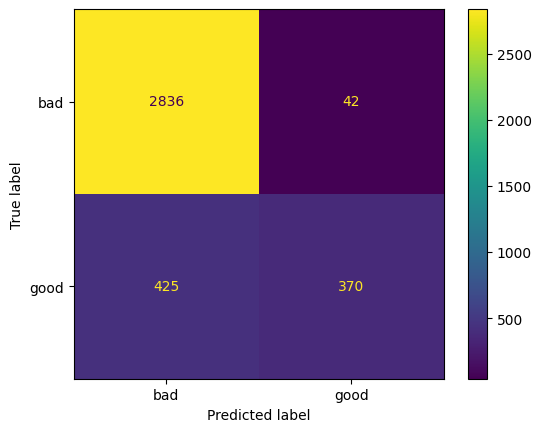

              precision    recall  f1-score   support

         bad       0.87      0.99      0.92      2878
        good       0.90      0.47      0.61       795

    accuracy                           0.87      3673
   macro avg       0.88      0.73      0.77      3673
weighted avg       0.88      0.87      0.86      3673


Métricas de avaliação de teste:
[[936  24]
 [171  94]]


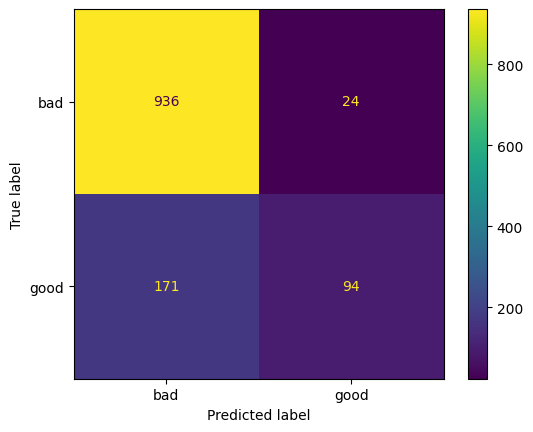

              precision    recall  f1-score   support

         bad       0.85      0.97      0.91       960
        good       0.80      0.35      0.49       265

    accuracy                           0.84      1225
   macro avg       0.82      0.66      0.70      1225
weighted avg       0.83      0.84      0.82      1225



In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train_rf_rlb = rand_rf_rlb.predict(X_train_rlb)

print(confusion_matrix(y_train_rlb, y_pred_train_rf_rlb))

ConfusionMatrixDisplay.from_predictions(y_train_rlb, y_pred_train_rf_rlb)
plt.show()

print(classification_report(y_train_rlb, y_pred_train_rf_rlb))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test_rf_rlb = rand_rf_rlb.predict(X_test_rlb)

print(confusion_matrix(y_test_rlb, y_pred_test_rf_rlb))

ConfusionMatrixDisplay.from_predictions(y_test_rlb, y_pred_test_rf_rlb)
plt.show()

print(classification_report(y_test_rlb, y_pred_test_rf_rlb))

### Testando SVC com relabel

In [ ]:
rand_svc_rlb = RandomizedSearchCV(estimator=pipe_svc, 
                        param_distributions=param_dist,
                        scoring=metrica,
                        cv=grupo,
                        n_iter=10,
                        verbose=10,
                        n_jobs=1)

In [ ]:
rand_svc_rlb.fit(X_train_rlb, y_train_rlb)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START svc__C=8, svc__gamma=0.1..................................
[CV 1/10; 1/10] END ...svc__C=8, svc__gamma=0.1;, score=0.812 total time=   0.4s
[CV 2/10; 1/10] START svc__C=8, svc__gamma=0.1..................................
[CV 2/10; 1/10] END ...svc__C=8, svc__gamma=0.1;, score=0.861 total time=   0.4s
[CV 3/10; 1/10] START svc__C=8, svc__gamma=0.1..................................
[CV 3/10; 1/10] END ...svc__C=8, svc__gamma=0.1;, score=0.826 total time=   0.4s
[CV 4/10; 1/10] START svc__C=8, svc__gamma=0.1..................................
[CV 4/10; 1/10] END ...svc__C=8, svc__gamma=0.1;, score=0.831 total time=   0.4s
[CV 5/10; 1/10] START svc__C=8, svc__gamma=0.1..................................
[CV 5/10; 1/10] END ...svc__C=8, svc__gamma=0.1;, score=0.864 total time=   0.4s
[CV 6/10; 1/10] START svc__C=8, svc__gamma=0.1..................................
[CV 6/10; 1/10] END ...svc__C=8, svc__gamma=0.

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scale', StandardScaler()),
                                             ('svc', SVC())]),
                   n_jobs=1,
                   param_distributions={'svc__C': array([2, 4, 6, 8]),
                                        'svc__gamma': array([0.1, 0.3, 0.5, 0.7, 0.9])},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [ ]:
print(f"Grid best parameters: {rand_svc_rlb.best_params_}")
print(f"Grid best Score: {rand_svc_rlb.best_score_}")

Grid best parameters: {'svc__gamma': 0.9000000000000001, 'svc__C': 2}
Grid best Score: 0.8559797417367611



Métricas de avaliação de treino:
[[2867   11]
 [  21  774]]


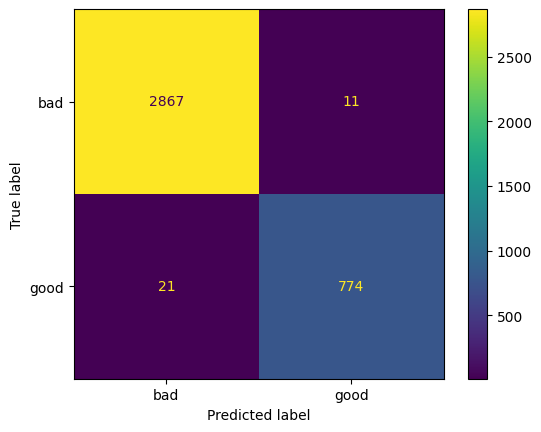

              precision    recall  f1-score   support

         bad       0.99      1.00      0.99      2878
        good       0.99      0.97      0.98       795

    accuracy                           0.99      3673
   macro avg       0.99      0.98      0.99      3673
weighted avg       0.99      0.99      0.99      3673


Métricas de avaliação de teste:
[[934  26]
 [112 153]]


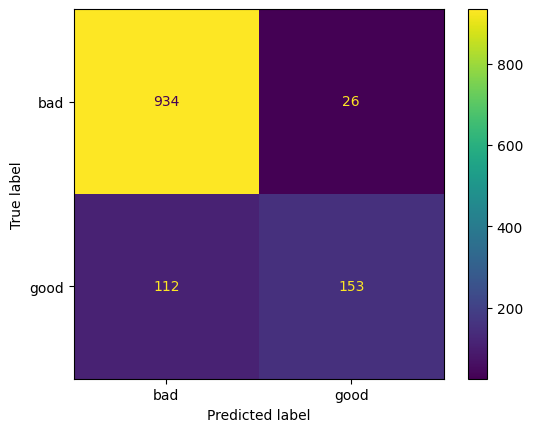

              precision    recall  f1-score   support

         bad       0.89      0.97      0.93       960
        good       0.85      0.58      0.69       265

    accuracy                           0.89      1225
   macro avg       0.87      0.78      0.81      1225
weighted avg       0.88      0.89      0.88      1225



In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train_svc_rlb = rand_svc_rlb.predict(X_train_rlb)

print(confusion_matrix(y_train_rlb, y_pred_train_svc_rlb))

ConfusionMatrixDisplay.from_predictions(y_train_rlb, y_pred_train_svc_rlb)
plt.show()

print(classification_report(y_train_rlb, y_pred_train_svc_rlb))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test_svc_rlb = rand_svc_rlb.predict(X_test_rlb)

print(confusion_matrix(y_test_rlb, y_pred_test_svc_rlb))

ConfusionMatrixDisplay.from_predictions(y_test_rlb, y_pred_test_svc_rlb)
plt.show()

print(classification_report(y_test_rlb, y_pred_test_svc_rlb))

### Criando novo algoritmo para qualidades 7 e 8

In [ ]:
df_whitewine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [ ]:
df_whitewine_good = df_whitewine[df_whitewine['quality'].isin([7, 8])]

In [ ]:
df_whitewine_good.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7
15,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8


In [ ]:
X_g = df_whitewine_good.drop(['quality'], axis=1) 
y_g = df_whitewine_good['quality']

In [ ]:
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_g, y_g, train_size = 0.75, stratify=y_g, random_state=42)

In [ ]:
y_g.value_counts()

7    880
8    175
Name: quality, dtype: int64

In [ ]:
# Usando Undersampling no 7
cc_g = ClusterCentroids(random_state=42, sampling_strategy={7:450, 8:131})


In [ ]:
y_train_g.value_counts()

7    660
8    131
Name: quality, dtype: int64

In [ ]:
X_resampled_g, y_resampled_g = cc_g.fit_resample(X_train_g, y_train_g)

In [ ]:
# Usando SMOTE no 9
sm = SMOTE(random_state = 42, sampling_strategy={7:450, 8:330})

X_train_sm_g, y_train_sm_g = sm.fit_resample(X_resampled_g, y_resampled_g.ravel())

In [ ]:
rand_rf_g = RandomizedSearchCV(estimator=pipe_rf, 
                        param_distributions=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        verbose=10,
                        n_jobs=1)

#### Usando modelo RandomForest

In [ ]:
rand_rf_g.fit(X_train_sm_g, y_train_sm_g)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=165.
[CV 1/10; 1/10] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=165;, score=0.705 total time=   0.4s
[CV 2/10; 1/10] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=165.
[CV 2/10; 1/10] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=165;, score=0.782 total time=   0.3s
[CV 3/10; 1/10] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=165.
[CV 3/10; 1/10] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=165;, score=0.756 total time=   0.3s
[CV 4/10; 1/10] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=165.
[CV 4/10; 1/10] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=165;, score=0.731 total time=   0.4s
[CV 5/10; 1/10] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=165.
[CV 5/10; 1/10] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=165;, score=0.

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                             ('rf', RandomForestClassifier())]),
                   n_jobs=1,
                   param_distributions={'rf__max_depth': range(4, 8),
                                        'rf__max_features': range(1, 3),
                                        'rf__n_estimators': range(150, 200, 15)},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [ ]:
print(f"Grid best parameters: {rand_rf_g.best_params_}")
print(f"Grid best Score: {rand_rf_g.best_score_}")

Grid best parameters: {'rf__n_estimators': 180, 'rf__max_features': 2, 'rf__max_depth': 7}
Grid best Score: 0.7628205128205128



Métricas de avaliação de treino:
[[660   0]
 [ 17 114]]


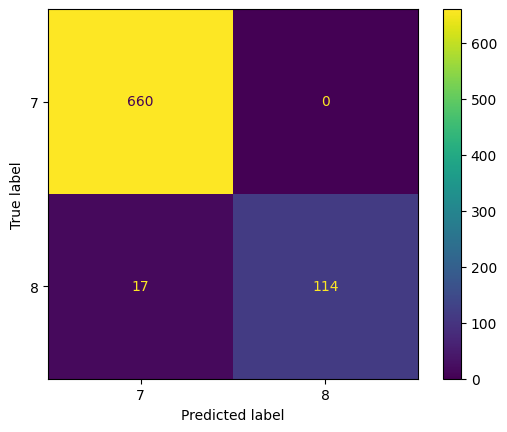

              precision    recall  f1-score   support

           7       0.97      1.00      0.99       660
           8       1.00      0.87      0.93       131

    accuracy                           0.98       791
   macro avg       0.99      0.94      0.96       791
weighted avg       0.98      0.98      0.98       791


Métricas de avaliação de teste:
[[209  11]
 [ 31  13]]


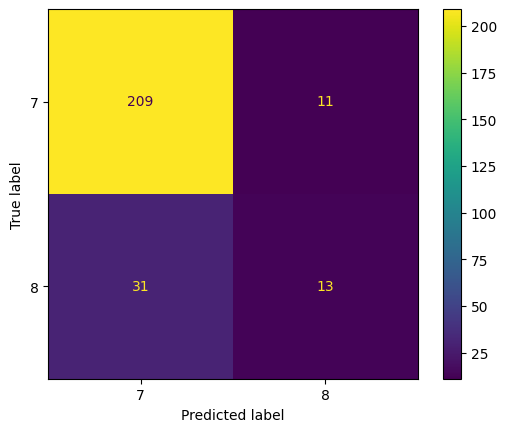

              precision    recall  f1-score   support

           7       0.87      0.95      0.91       220
           8       0.54      0.30      0.38        44

    accuracy                           0.84       264
   macro avg       0.71      0.62      0.65       264
weighted avg       0.82      0.84      0.82       264



In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = rand_rf_g.predict(X_train_g)

print(confusion_matrix(y_train_g, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train_g, y_pred_train)
plt.show()

print(classification_report(y_train_g, y_pred_train))
# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = rand_rf_g.predict(X_test_g)

print(confusion_matrix(y_test_g, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test_g, y_pred_test)
plt.show()

print(classification_report(y_test_g, y_pred_test))

#### Usando modelo SVC

In [ ]:
rand_svc_g = RandomizedSearchCV(estimator=pipe_svc, 
                        param_distributions=param_dist,
                        scoring=metrica,
                        cv=grupo,
                        n_iter=10,
                        verbose=10,
                        n_jobs=1)

In [ ]:
rand_svc_g.fit(X_train_sm_g, y_train_sm_g)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START svc__C=8, svc__gamma=0.30000000000000004..................
[CV 1/10; 1/10] END svc__C=8, svc__gamma=0.30000000000000004;, score=0.782 total time=   0.1s
[CV 2/10; 1/10] START svc__C=8, svc__gamma=0.30000000000000004..................
[CV 2/10; 1/10] END svc__C=8, svc__gamma=0.30000000000000004;, score=0.808 total time=   0.1s
[CV 3/10; 1/10] START svc__C=8, svc__gamma=0.30000000000000004..................
[CV 3/10; 1/10] END svc__C=8, svc__gamma=0.30000000000000004;, score=0.885 total time=   0.1s
[CV 4/10; 1/10] START svc__C=8, svc__gamma=0.30000000000000004..................
[CV 4/10; 1/10] END svc__C=8, svc__gamma=0.30000000000000004;, score=0.821 total time=   0.1s
[CV 5/10; 1/10] START svc__C=8, svc__gamma=0.30000000000000004..................
[CV 5/10; 1/10] END svc__C=8, svc__gamma=0.30000000000000004;, score=0.872 total time=   0.1s
[CV 6/10; 1/10] START svc__C=8, svc__gamma=0.30000000000000004

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scale', StandardScaler()),
                                             ('svc', SVC())]),
                   n_jobs=1,
                   param_distributions={'svc__C': array([2, 4, 6, 8]),
                                        'svc__gamma': array([0.1, 0.3, 0.5, 0.7, 0.9])},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [ ]:
print(f"Grid best parameters: {rand_svc_g.best_params_}")
print(f"Grid best Score: {rand_svc_g.best_score_}")

Grid best parameters: {'svc__gamma': 0.9000000000000001, 'svc__C': 6}
Grid best Score: 0.8692307692307694



Métricas de avaliação de treino:
[[657   3]
 [  0 131]]


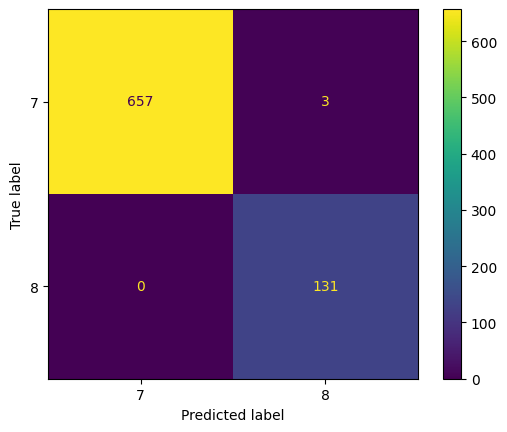

              precision    recall  f1-score   support

           7       1.00      1.00      1.00       660
           8       0.98      1.00      0.99       131

    accuracy                           1.00       791
   macro avg       0.99      1.00      0.99       791
weighted avg       1.00      1.00      1.00       791


Métricas de avaliação de teste:
[[208  12]
 [ 27  17]]


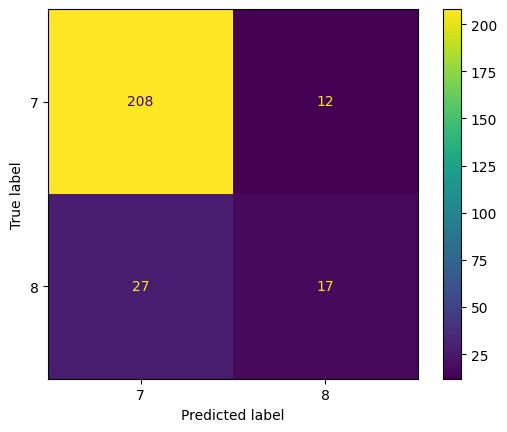

              precision    recall  f1-score   support

           7       0.89      0.95      0.91       220
           8       0.59      0.39      0.47        44

    accuracy                           0.85       264
   macro avg       0.74      0.67      0.69       264
weighted avg       0.84      0.85      0.84       264



In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = rand_svc_g.predict(X_train_g)

print(confusion_matrix(y_train_g, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train_g, y_pred_train)
plt.show()

print(classification_report(y_train_g, y_pred_train))
# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = rand_svc_g.predict(X_test_g)

print(confusion_matrix(y_test_g, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test_g, y_pred_test)
plt.show()

print(classification_report(y_test_g, y_pred_test))

---
# Conclusão:

Para finalizar o trabalho e toda a análise, faremos a conclusão respondendo a seguinte pergunta: **o modelo iria para produção?**


*Sim!* Os resultados do projeto podem ser usados por produtores de vinho para melhorar a qualidade de seus produtos, bem como por consumidores para tomar decisões mais informadas sobre quais vinhos escolher. 

Além disso, o modelo poderia ajudar a expandir o conhecimento sobre a produção de vinho, auxiliar no aprendizado de novos enólogos e auxiliar nas avaliações feitas pelos sommeliers que, por se basearem em experiências, estão propensos a fatores subjetivos.



---
# Referências Bibliográficas:

>CORTEZ, P.; CERDEIRA, A.; ALMEIDA, F.; MATOS, T.; REIS, J. Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, v. 47 (4), p. 547-553, 2009. DOI: 10.1016/j.dss.2009.05.016.


>Kaggle. Wine Quality Dataset. Disponível em: <https://www.kaggle.com/datasets/yasserh/wine-quality-dataset> Acesso em: 30 março de 2023.


>Slidego. Oficina de linguagens de programação para iniciantes. Disponível em: <https://slidesgo.com/pt/tema/oficina-de-linguagens-de-programacao-para-iniciantes#position-8&related-1&rs=detail-related>. Acesso em: 30 de março de 2023.